In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Your task is to use the Heart Disease UCI dataset to predict whether or not a patient has heart disease based on various medical attributes.

# **1. Data Preparation:**

In [232]:
file = pd.read_csv("/content/drive/MyDrive/GENAI/Week4/Day5/heart_disease_uci.csv")
df = pd.DataFrame(file)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


On supprime les lignes en double

In [233]:
df.drop_duplicates(inplace=True)

On supprime id et dataset car ces colonnes ne nous apportenr aucune information pour notre objectif de prediction

In [234]:
df.drop(['id', 'dataset'], axis=1, inplace=True)

In [235]:
df.shape

(920, 14)

Le dataframe contient 920 cas différents et 15 colonnes dont num qui correpond au niveau de maladie cardiaque du patient qui est la variable à prédire.

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [237]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [238]:
df.isna().mean() * 100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261
exang,5.978261
oldpeak,6.739130


Nous supprimons les colonnes présentant un taux de valeurs manquantes supérieur à 10 %, car générer artificiellement ces données risquerait d'introduire des biais et de compromettre la qualité de l'analyse.

In [239]:
df.drop(["slope", "ca", "thal"], axis = 1, inplace = True)

Nous imputons les valeurs manquantes des variables numériques en remplaçant celles-ci par la moyenne de chaque variable.

In [240]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[["trestbps", "chol", "thalch", "oldpeak"]] = imputer.fit_transform(df[["trestbps", "chol", "thalch", "oldpeak"]])

Nous imputons les valeurs manquantes des variables catégorielles en les remplaçant par la modalité la plus fréquente de chaque variable.

In [241]:
imputer2 = SimpleImputer(strategy='most_frequent')
df[["fbs", "restecg", "exang"]] = imputer2.fit_transform(df[["fbs", "restecg", "exang"]])

In [242]:
df.isna().mean() * 100

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalch,0.0
exang,0.0
oldpeak,0.0


A présent le df ne contient plus de valeurs nuls

In [243]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


Nous encodons les variables afin de pouvoir calculer une matrice de corrélation, dans le but d’obtenir des insights sur la relation entre la variable cible (num) et les autres variables.

In [244]:
df_encoded = df.copy()

In [245]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded["sex"] = le.fit_transform(df_encoded["sex"])
df_encoded["cp"] = le.fit_transform(df_encoded["cp"])
df_encoded["fbs"] = le.fit_transform(df_encoded["fbs"])
df_encoded["restecg"] = le.fit_transform(df_encoded["restecg"])
df_encoded["exang"] = le.fit_transform(df_encoded["exang"])

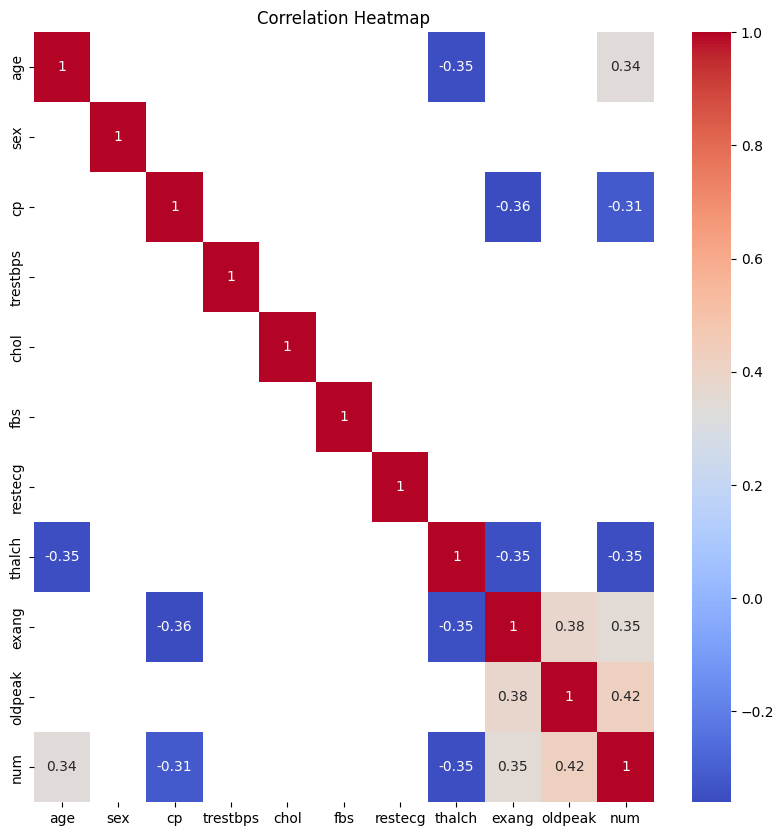

In [246]:
corr = df_encoded.corr()
filtered_corr = corr[abs(corr)>= 0.3]
plt.figure(figsize=(10,10))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

La corrélation montre que oldpeak, exang, thalach, cp et age sont les plus liées à la présence de maladie cardiaque. D’autres variables ont peu d’impact linéaire. Cela permet d’identifier les attributs les plus pertinents pour la prédiction.


On crée deux groupes distincts. Le premier qui contient les personnes ne montrant aucun signe de maladies cardiaque. Et le second qui contient les personnes qui présentent des signes de maladies cardiaque.

In [280]:
df_0 = df[df["num"] == 0]
df_1 = df[df["num"] == 1]
df_2 = df[df["num"] == 2]
df_3 = df[df["num"] == 3]
df_4 = df[df["num"] == 4]

In [281]:
df_0_encoded = df_encoded[df_encoded["num"] == 0]
df_1_encoded = df_encoded[df_encoded["num"] == 1]
df_2_encoded = df_encoded[df_encoded["num"] == 2]
df_3_encoded = df_encoded[df_encoded["num"] == 3]
df_4_encoded = df_encoded[df_encoded["num"] == 4]

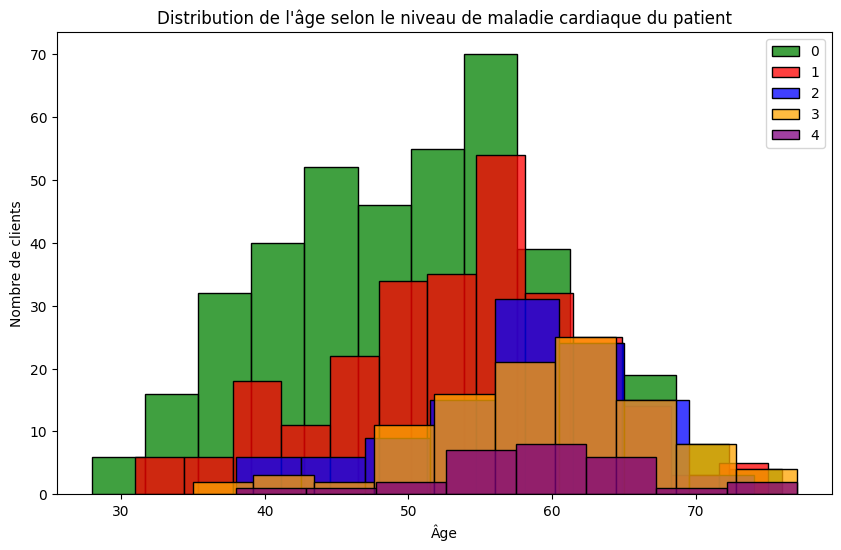

In [284]:
plt.figure(figsize=(10, 6))

sns.histplot(df_0['age'], color='green', label='0')
sns.histplot(df_1['age'], color='red', label='1')
sns.histplot(df_2['age'], color='blue', label='2')
sns.histplot(df_3['age'], color='orange', label='3')
sns.histplot(df_4['age'], color='purple', label='4')

plt.title("Distribution de l'âge selon le niveau de maladie cardiaque du patient")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()

In [250]:
sane_metrics = pd.DataFrame({'mean'  :[df_0['age'].mean()],
                       'std' : [df_0['age'].std()]}, index = ["sane"])
sane_metrics

,mean,std
sane,50.547445,9.4337


In [286]:
ill1_metrics = pd.DataFrame({'mean'  :[df_1['age'].mean()],
                       'std' : [df_1['age'].std()]}, index = ["ill"])
ill1_metrics

,mean,std
ill,53.528302,8.740371


In [287]:
ill2_metrics = pd.DataFrame({'mean'  :[df_2['age'].mean()],
                       'std' : [df_2['age'].std()]}, index = ["ill"])
ill2_metrics

,mean,std
ill,57.577982,7.786852


In [288]:
ill3_metrics = pd.DataFrame({'mean'  :[df_3['age'].mean()],
                       'std' : [df_3['age'].std()]}, index = ["ill"])
ill3_metrics

,mean,std
ill,59.214953,7.990594


In [289]:
ill4_metrics = pd.DataFrame({'mean'  :[df_4['age'].mean()],
                       'std' : [df_4['age'].std()]}, index = ["ill"])
ill4_metrics

,mean,std
ill,59.214286,8.283661


In [290]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(
    df_0['age'],
    df_1['age'],
    df_2['age'],
    df_3['age'],
    df_4['age']
)

if p_value < 0.05:
    print("✅ We reject the null hypothesis: there is a statistically significant difference in age between at least two of the groups.")
else:
    print("❌ We fail to reject the null hypothesis: no significant difference in age between the groups.")


✅ We reject the null hypothesis: there is a statistically significant difference in age between at least two of the groups.


On utilise le bootstraping pour recentrer les valeurs autour de l'age moyen generale et calculer leurs standard deviation.

In [253]:
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

In [292]:
overall_mean = df['age'].mean()

age_0_mean = df_0['age'].mean()
age_1_mean = df_1['age'].mean()
age_2_mean = df_2['age'].mean()
age_3_mean = df_3['age'].mean()
age_4_mean = df_4['age'].mean()

means = [age_0_mean, age_1_mean, age_2_mean, age_3_mean, age_4_mean]
diff_mean = max(means) - min(means)
print(f"Observed max difference in means: {diff_mean:.2f}")

df_0['Age_shifted'] = df_0['age'] - age_0_mean + overall_mean
df_1['Age_shifted'] = df_1['age'] - age_1_mean + overall_mean
df_2['Age_shifted'] = df_2['age'] - age_2_mean + overall_mean
df_3['Age_shifted'] = df_3['age'] - age_3_mean + overall_mean
df_4['Age_shifted'] = df_4['age'] - age_4_mean + overall_mean

Observed max difference in means: 8.67


/tmp/ipython-input-292-2558067699.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Age_shifted'] = df_0['age'] - age_0_mean + overall_mean
/tmp/ipython-input-292-2558067699.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age_shifted'] = df_1['age'] - age_1_mean + overall_mean
/tmp/ipython-input-292-2558067699.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [293]:
bs_size = 1000
bs_0_std = bs_choice(df_0['Age_shifted'], np.std, bs_size)
bs_1_std = bs_choice(df_1['Age_shifted'], np.std, bs_size)
bs_2_std = bs_choice(df_2['Age_shifted'], np.std, bs_size)
bs_3_std = bs_choice(df_3['Age_shifted'], np.std, bs_size)
bs_4_std = bs_choice(df_4['Age_shifted'], np.std, bs_size)

print(f"Bootstrap standard deviation for group 0: {np.std(bs_0_std):.2f}")
print(f"Bootstrap standard deviation for group 1: {np.std(bs_1_std):.2f}")
print(f"Bootstrap standard deviation for group 2: {np.std(bs_2_std):.2f}")
print(f"Bootstrap standard deviation for group 3: {np.std(bs_3_std):.2f}")
print(f"Bootstrap standard deviation for group 4: {np.std(bs_4_std):.2f}")

Bootstrap standard deviation for group 0: 0.29
Bootstrap standard deviation for group 1: 0.36
Bootstrap standard deviation for group 2: 0.51
Bootstrap standard deviation for group 3: 0.58
Bootstrap standard deviation for group 4: 1.33


In [294]:
bs_size = 1000
bs_0_mean = bs_choice(df_0['Age_shifted'], np.mean, bs_size)
bs_1_mean = bs_choice(df_1['Age_shifted'], np.mean, bs_size)
bs_2_mean = bs_choice(df_2['Age_shifted'], np.mean, bs_size)
bs_3_mean = bs_choice(df_3['Age_shifted'], np.mean, bs_size)
bs_4_mean = bs_choice(df_4['Age_shifted'], np.mean, bs_size)

bs_means = [bs_0_mean, bs_1_mean, bs_2_mean, bs_3_mean, bs_4_mean]
bs_max = np.max(bs_means, axis=0)
bs_min = np.min(bs_means, axis=0)
bs_diff_mean = bs_max - bs_min

p_value = np.mean(bs_diff_mean >= diff_mean)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


La p-value obtenue est de 0, ce qui est inférieur à la p_value de 0,05. Par conséquent, nous ne rejetons pas l’hypothèse nulle. Cela signifie qu’il existe une différence statistiquement significative entre les âges moyens des patients qui sont atteint de maladies cardiques et ceux qui ne le sont pas.

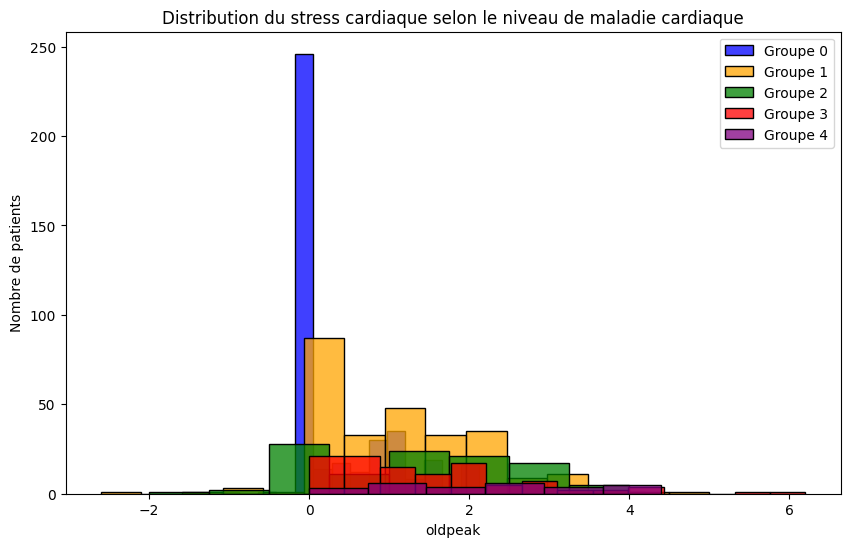

In [295]:
plt.figure(figsize=(10, 6))

sns.histplot(df_0['oldpeak'], label='Groupe 0', color='blue')
sns.histplot(df_1['oldpeak'], label='Groupe 1', color='orange')
sns.histplot(df_2['oldpeak'], label='Groupe 2', color='green')
sns.histplot(df_3['oldpeak'], label='Groupe 3', color='red')
sns.histplot(df_4['oldpeak'], label='Groupe 4', color='purple')

plt.title("Distribution du stress cardiaque selon le niveau de maladie cardiaque")
plt.xlabel("oldpeak")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()


In [258]:
sane_metrics = pd.DataFrame({'mean'  :[df_0['oldpeak'].mean()],
                       'std' : [df_0['oldpeak'].std()]}, index = ["sane"])
sane_metrics

,mean,std
sane,0.441739,0.704425


In [296]:
ill1_metrics = pd.DataFrame({'mean'  :[df_1['oldpeak'].mean()],
                       'std' : [df_1['oldpeak'].std()]}, index = ["sane"])
ill1_metrics

,mean,std
sane,0.994271,1.00597


In [297]:
ill2_metrics = pd.DataFrame({'mean'  :[df_2['oldpeak'].mean()],
                       'std' : [df_2['oldpeak'].std()]}, index = ["sane"])
ill2_metrics

,mean,std
sane,1.318627,1.170555


In [298]:
ill3_metrics = pd.DataFrame({'mean'  :[df_3['oldpeak'].mean()],
                       'std' : [df_3['oldpeak'].std()]}, index = ["sane"])
ill3_metrics

,mean,std
sane,1.476267,1.247391


In [299]:
ill4_metrics = pd.DataFrame({'mean'  :[df_4['oldpeak'].mean()],
                       'std' : [df_4['oldpeak'].std()]}, index = ["sane"])
ill4_metrics

,mean,std
sane,2.205628,1.310221


In [300]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(
    df_0['oldpeak'],
    df_1['oldpeak'],
    df_2['oldpeak'],
    df_3['oldpeak'],
    df_4['oldpeak']
)

if p_value < 0.05:
    print("✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.")
else:
    print("❌ We fail to reject the null hypothesis: no significant difference between the groups.")


✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.


In [301]:
oldpeak_0_mean = df_0['oldpeak'].mean()
oldpeak_1_mean = df_1['oldpeak'].mean()
oldpeak_2_mean = df_2['oldpeak'].mean()
oldpeak_3_mean = df_3['oldpeak'].mean()
oldpeak_4_mean = df_4['oldpeak'].mean()

means = [oldpeak_0_mean, oldpeak_1_mean, oldpeak_2_mean, oldpeak_3_mean, oldpeak_4_mean]
diff_mean = max(means) - min(means)
print(f"Observed max difference in means: {diff_mean:.2f}")

overall_mean = df['oldpeak'].mean()

df_0['oldpeak_shifted'] = df_0['oldpeak'] - oldpeak_0_mean + overall_mean
df_1['oldpeak_shifted'] = df_1['oldpeak'] - oldpeak_1_mean + overall_mean
df_2['oldpeak_shifted'] = df_2['oldpeak'] - oldpeak_2_mean + overall_mean
df_3['oldpeak_shifted'] = df_3['oldpeak'] - oldpeak_3_mean + overall_mean
df_4['oldpeak_shifted'] = df_4['oldpeak'] - oldpeak_4_mean + overall_mean

Observed max difference in means: 1.76


In [302]:
bs_size = 1000
bs_0_std = bs_choice(df_0['oldpeak_shifted'], np.std, bs_size)
bs_1_std = bs_choice(df_1['oldpeak_shifted'], np.std, bs_size)
bs_2_std = bs_choice(df_2['oldpeak_shifted'], np.std, bs_size)
bs_3_std = bs_choice(df_3['oldpeak_shifted'], np.std, bs_size)
bs_4_std = bs_choice(df_4['oldpeak_shifted'], np.std, bs_size)

print(f"Bootstrap standard deviation for group 0: {np.std(bs_0_std):.2f}")
print(f"Bootstrap standard deviation for group 1: {np.std(bs_1_std):.2f}")
print(f"Bootstrap standard deviation for group 2: {np.std(bs_2_std):.2f}")
print(f"Bootstrap standard deviation for group 3: {np.std(bs_3_std):.2f}")
print(f"Bootstrap standard deviation for group 4: {np.std(bs_4_std):.2f}")

Bootstrap standard deviation for group 0: 0.04
Bootstrap standard deviation for group 1: 0.05
Bootstrap standard deviation for group 2: 0.07
Bootstrap standard deviation for group 3: 0.11
Bootstrap standard deviation for group 4: 0.12


In [303]:
bs_size = 1000
bs_0_mean = bs_choice(df_0['oldpeak_shifted'], np.mean, bs_size)
bs_1_mean = bs_choice(df_1['oldpeak_shifted'], np.mean, bs_size)
bs_2_mean = bs_choice(df_2['oldpeak_shifted'], np.mean, bs_size)
bs_3_mean = bs_choice(df_3['oldpeak_shifted'], np.mean, bs_size)
bs_4_mean = bs_choice(df_4['oldpeak_shifted'], np.mean, bs_size)

bs_means = [bs_0_mean, bs_1_mean, bs_2_mean, bs_3_mean, bs_4_mean]
bs_max = np.max(bs_means, axis=0)
bs_min = np.min(bs_means, axis=0)
bs_diff_mean = bs_max - bs_min

p_value = np.mean(bs_diff_mean >= diff_mean)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


La p-value obtenue est de 0, ce qui est inférieur à la p_value de 0,05. Par conséquent, nous ne rejetons pas l’hypothèse nulle. Cela signifie qu’il existe une différence statistiquement significative entre les stress cardiaques des patients qui sont atteint de maladies cardiques et ceux qui ne le sont pas.

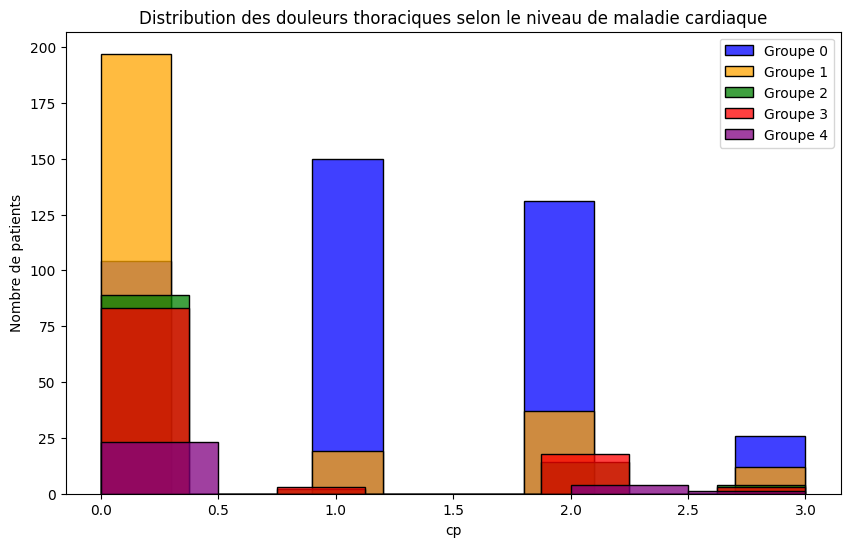

In [304]:
plt.figure(figsize=(10, 6))

sns.histplot(df_0_encoded['cp'], color='blue', label='Groupe 0')
sns.histplot(df_1_encoded['cp'], color='orange', label='Groupe 1')
sns.histplot(df_2_encoded['cp'], color='green', label='Groupe 2')
sns.histplot(df_3_encoded['cp'], color='red', label='Groupe 3')
sns.histplot(df_4_encoded['cp'], color='purple', label='Groupe 4')

plt.title("Distribution des douleurs thoraciques selon le niveau de maladie cardiaque")
plt.xlabel("cp")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()

In [265]:
sane_metrics = pd.DataFrame({'mean'  :[df_0_encoded['cp'].mean()],
                       'std' : [df_0_encoded['cp'].std()]}, index = ["sane"])
sane_metrics

,mean,std
sane,1.192214,0.888703


In [305]:
ill1_metrics = pd.DataFrame({'mean'  :[df_1_encoded['cp'].mean()],
                       'std' : [df_1_encoded['cp'].std()]}, index = ["sane"])
ill1_metrics

,mean,std
sane,0.486792,0.89655


In [306]:
ill2_metrics = pd.DataFrame({'mean'  :[df_2_encoded['cp'].mean()],
                       'std' : [df_2_encoded['cp'].std()]}, index = ["sane"])
ill2_metrics

,mean,std
sane,0.385321,0.848836


In [307]:
ill3_metrics = pd.DataFrame({'mean'  :[df_3_encoded['cp'].mean()],
                       'std' : [df_3_encoded['cp'].std()]}, index = ["sane"])
ill3_metrics

,mean,std
sane,0.448598,0.871278


In [308]:
ill4_metrics = pd.DataFrame({'mean'  :[df_4_encoded['cp'].mean()],
                       'std' : [df_4_encoded['cp'].std()]}, index = ["sane"])
ill4_metrics

,mean,std
sane,0.392857,0.875142


In [309]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(
    df_0_encoded['cp'],
    df_1_encoded['cp'],
    df_2_encoded['cp'],
    df_3_encoded['cp'],
    df_4_encoded['cp']
)

if p_value < 0.05:
    print("✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.")
else:
    print("❌ We fail to reject the null hypothesis: no significant difference between the groups.")


✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.


In [310]:
cp_0_mean = df_0_encoded['cp'].mean()
cp_1_mean = df_1_encoded['cp'].mean()
cp_2_mean = df_2_encoded['cp'].mean()
cp_3_mean = df_3_encoded['cp'].mean()
cp_4_mean = df_4_encoded['cp'].mean()

means = [cp_0_mean, cp_1_mean, cp_2_mean, cp_3_mean, cp_4_mean]
diff_mean = max(means) - min(means)
print(f"Observed max difference in means: {diff_mean:.2f}")

overall_mean = df_encoded['cp'].mean()

df_0_encoded['cp_shifted'] = df_0_encoded['cp'] - cp_0_mean + overall_mean
df_1_encoded['cp_shifted'] = df_1_encoded['cp'] - cp_1_mean + overall_mean
df_2_encoded['cp_shifted'] = df_2_encoded['cp'] - cp_2_mean + overall_mean
df_3_encoded['cp_shifted'] = df_3_encoded['cp'] - cp_3_mean + overall_mean
df_4_encoded['cp_shifted'] = df_4_encoded['cp'] - cp_4_mean + overall_mean

Observed max difference in means: 0.81


In [311]:
bs_size = 1000
bs_0_std = bs_choice(df_0_encoded['cp_shifted'], np.std, bs_size)
bs_1_std = bs_choice(df_1_encoded['cp_shifted'], np.std, bs_size)
bs_2_std = bs_choice(df_2_encoded['cp_shifted'], np.std, bs_size)
bs_3_std = bs_choice(df_3_encoded['cp_shifted'], np.std, bs_size)
bs_4_std = bs_choice(df_4_encoded['cp_shifted'], np.std, bs_size)

print(f"Bootstrap standard deviation for group 0: {np.std(bs_0_std):.2f}")
print(f"Bootstrap standard deviation for group 1: {np.std(bs_1_std):.2f}")
print(f"Bootstrap standard deviation for group 2: {np.std(bs_2_std):.2f}")
print(f"Bootstrap standard deviation for group 3: {np.std(bs_3_std):.2f}")
print(f"Bootstrap standard deviation for group 4: {np.std(bs_4_std):.2f}")

Bootstrap standard deviation for group 0: 0.02
Bootstrap standard deviation for group 1: 0.05
Bootstrap standard deviation for group 2: 0.08
Bootstrap standard deviation for group 3: 0.07
Bootstrap standard deviation for group 4: 0.17


In [312]:
bs_size = 1000
bs_0_mean = bs_choice(df_0_encoded['cp_shifted'], np.mean, bs_size)
bs_1_mean = bs_choice(df_1_encoded['cp_shifted'], np.mean, bs_size)
bs_2_mean = bs_choice(df_2_encoded['cp_shifted'], np.mean, bs_size)
bs_3_mean = bs_choice(df_3_encoded['cp_shifted'], np.mean, bs_size)
bs_4_mean = bs_choice(df_4_encoded['cp_shifted'], np.mean, bs_size)

bs_means = [bs_0_mean, bs_1_mean, bs_2_mean, bs_3_mean, bs_4_mean]
bs_max = np.max(bs_means, axis=0)
bs_min = np.min(bs_means, axis=0)
bs_diff_mean = bs_max - bs_min

p_value = np.mean(bs_diff_mean >= diff_mean)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


La p-value obtenue est de 0, ce qui est inférieur à la p_value de 0,05. Par conséquent, nous ne rejetons pas l’hypothèse nulle. Cela signifie qu’il existe une différence statistiquement significative entre les douleurs thoraciques
des patients qui sont atteint de maladies cardiques et ceux qui ne le sont pas.

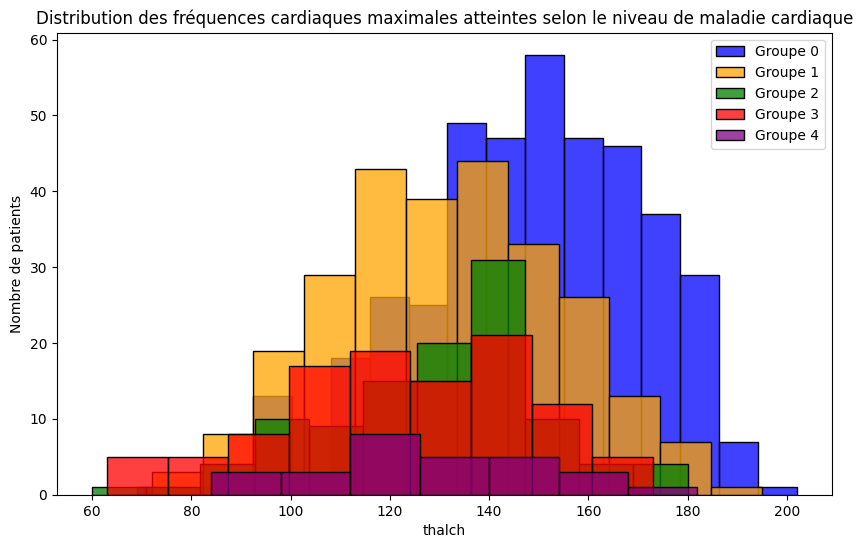

In [314]:
plt.figure(figsize=(10, 6))

sns.histplot(df_0['thalch'], color='blue', label='Groupe 0')
sns.histplot(df_1['thalch'], color='orange', label='Groupe 1')
sns.histplot(df_2['thalch'], color='green', label='Groupe 2')
sns.histplot(df_3['thalch'], color='red', label='Groupe 3')
sns.histplot(df_4['thalch'], color='purple', label='Groupe 4')

plt.title("Distribution des fréquences cardiaques maximales atteintes selon le niveau de maladie cardiaque")
plt.xlabel("thalch")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()

In [273]:
sane_metrics = pd.DataFrame({'mean'  :[df_0['thalch'].mean()],
                       'std' : [df_0['thalch'].std()]}, index = ["sane"])
sane_metrics

,mean,std
sane,148.25283,23.152969


In [313]:
ill1_metrics = pd.DataFrame({'mean'  :[df_1['thalch'].mean()],
                       'std' : [df_1['thalch'].std()]}, index = ["sane"])
ill1_metrics

,mean,std
sane,131.35507,22.859633


In [315]:
ill2_metrics = pd.DataFrame({'mean'  :[df_2['thalch'].mean()],
                       'std' : [df_2['thalch'].std()]}, index = ["sane"])
ill2_metrics

,mean,std
sane,129.236878,22.168355


In [316]:
ill3_metrics = pd.DataFrame({'mean'  :[df_3['thalch'].mean()],
                       'std' : [df_3['thalch'].std()]}, index = ["sane"])
ill3_metrics

,mean,std
sane,122.570969,24.642309


In [317]:
ill4_metrics = pd.DataFrame({'mean'  :[df_4['thalch'].mean()],
                       'std' : [df_4['thalch'].std()]}, index = ["sane"])
ill4_metrics

,mean,std
sane,128.538976,23.180536


In [318]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(
    df_0['thalch'],
    df_1['thalch'],
    df_2['thalch'],
    df_3['thalch'],
    df_4['thalch']
)

if p_value < 0.05:
    print("✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.")
else:
    print("❌ We fail to reject the null hypothesis: no significant difference between the groups.")

✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.


In [319]:
thalch_0_mean = df_0['thalch'].mean()
thalch_1_mean = df_1['thalch'].mean()
thalch_2_mean = df_2['thalch'].mean()
thalch_3_mean = df_3['thalch'].mean()
thalch_4_mean = df_4['thalch'].mean()

means = [thalch_0_mean, thalch_1_mean, thalch_2_mean, thalch_3_mean, thalch_4_mean]
diff_mean = max(means) - min(means)
print(f"Observed max difference in means: {diff_mean:.2f}")

overall_mean = df['thalch'].mean()

df_0['thalch_shifted'] = df_0['thalch'] - thalch_0_mean + overall_mean
df_1['thalch_shifted'] = df_1['thalch'] - thalch_1_mean + overall_mean
df_2['thalch_shifted'] = df_2['thalch'] - thalch_2_mean + overall_mean
df_3['thalch_shifted'] = df_3['thalch'] - thalch_3_mean + overall_mean
df_4['thalch_shifted'] = df_4['thalch'] - thalch_4_mean + overall_mean

Observed max difference in means: 25.68


In [320]:
bs_size = 1000
bs_0_std = bs_choice(df_0['thalch_shifted'], np.std, bs_size)
bs_1_std = bs_choice(df_1['thalch_shifted'], np.std, bs_size)
bs_2_std = bs_choice(df_2['thalch_shifted'], np.std, bs_size)
bs_3_std = bs_choice(df_3['thalch_shifted'], np.std, bs_size)
bs_4_std = bs_choice(df_4['thalch_shifted'], np.std, bs_size)

print(f"Bootstrap standard deviation for group 0: {np.std(bs_0_std):.2f}")
print(f"Bootstrap standard deviation for group 1: {np.std(bs_1_std):.2f}")
print(f"Bootstrap standard deviation for group 2: {np.std(bs_2_std):.2f}")
print(f"Bootstrap standard deviation for group 3: {np.std(bs_3_std):.2f}")
print(f"Bootstrap standard deviation for group 4: {np.std(bs_4_std):.2f}")

Bootstrap standard deviation for group 0: 0.79
Bootstrap standard deviation for group 1: 0.85
Bootstrap standard deviation for group 2: 1.55
Bootstrap standard deviation for group 3: 1.49
Bootstrap standard deviation for group 4: 2.89


In [321]:
bs_size = 1000
bs_0_mean = bs_choice(df_0['thalch_shifted'], np.mean, bs_size)
bs_1_mean = bs_choice(df_1['thalch_shifted'], np.mean, bs_size)
bs_2_mean = bs_choice(df_2['thalch_shifted'], np.mean, bs_size)
bs_3_mean = bs_choice(df_3['thalch_shifted'], np.mean, bs_size)
bs_4_mean = bs_choice(df_4['thalch_shifted'], np.mean, bs_size)

bs_means = [bs_0_mean, bs_1_mean, bs_2_mean, bs_3_mean, bs_4_mean]
bs_max = np.max(bs_means, axis=0)
bs_min = np.min(bs_means, axis=0)
bs_diff_mean = bs_max - bs_min

p_value = np.mean(bs_diff_mean >= diff_mean)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


La p-value obtenue est de 0, ce qui est inférieur à la p_value de 0,05. Par conséquent, nous ne rejetons pas l’hypothèse nulle. Cela signifie qu’il existe une différence statistiquement significative entre les fréquences cardiaque maximale atteinte des patients qui sont atteint de maladies cardiques et ceux qui ne le sont pas.

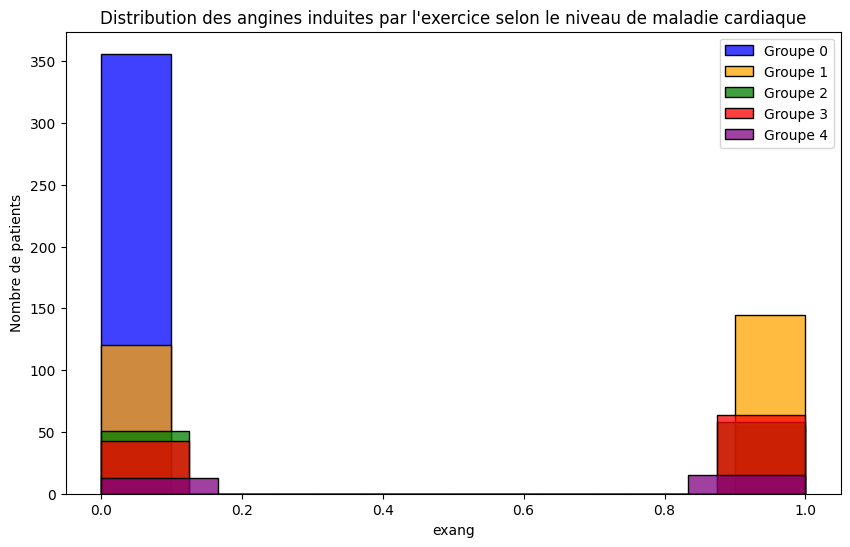

In [322]:
plt.figure(figsize=(10, 6))

sns.histplot(df_0['exang'], color='blue', label='Groupe 0')
sns.histplot(df_1['exang'], color='orange', label='Groupe 1')
sns.histplot(df_2['exang'], color='green', label='Groupe 2')
sns.histplot(df_3['exang'], color='red', label='Groupe 3')
sns.histplot(df_4['exang'], color='purple', label='Groupe 4')

plt.title("Distribution des angines induites par l'exercice selon le niveau de maladie cardiaque")
plt.xlabel("exang")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()

In [323]:
sane_metrics = pd.DataFrame({'mean'  :[df_0['exang'].mean()],
                       'std' : [df_0['exang'].std()]}, index = ["sane"])
sane_metrics

,mean,std
sane,0.13382,0.340874


In [324]:
ill1_metrics = pd.DataFrame({'mean'  :[df_1['exang'].mean()],
                       'std' : [df_1['exang'].std()]}, index = ["sane"])
ill1_metrics

,mean,std
sane,0.54717,0.498712


In [325]:
ill2_metrics = pd.DataFrame({'mean'  :[df_2['exang'].mean()],
                       'std' : [df_2['exang'].std()]}, index = ["sane"])
ill2_metrics

,mean,std
sane,0.53211,0.501273


In [326]:
ill3_metrics = pd.DataFrame({'mean'  :[df_3['exang'].mean()],
                       'std' : [df_3['exang'].std()]}, index = ["sane"])
ill3_metrics

,mean,std
sane,0.598131,0.492583


In [327]:
ill4_metrics = pd.DataFrame({'mean'  :[df_4['exang'].mean()],
                       'std' : [df_4['exang'].std()]}, index = ["sane"])
ill4_metrics

,mean,std
sane,0.535714,0.507875


In [328]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(
    df_0['exang'],
    df_1['exang'],
    df_2['exang'],
    df_3['exang'],
    df_4['exang']
)

if p_value < 0.05:
    print("✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.")
else:
    print("❌ We fail to reject the null hypothesis: no significant difference between the groups.")

✅ We reject the null hypothesis: there is a statistically significant difference between at least two groups.


In [329]:
exang_0_mean = df_0['exang'].mean()
exang_1_mean = df_1['exang'].mean()
exang_2_mean = df_2['exang'].mean()
exang_3_mean = df_3['exang'].mean()
exang_4_mean = df_4['exang'].mean()

means = [exang_0_mean, exang_1_mean, exang_2_mean, exang_3_mean, exang_4_mean]
diff_mean = max(means) - min(means)
print(f"Observed max difference in means: {diff_mean:.2f}")

overall_mean = df['thalch'].mean()

df_0['exang_shifted'] = df_0['exang'] - exang_0_mean + overall_mean
df_1['exang_shifted'] = df_1['exang'] - exang_1_mean + overall_mean
df_2['exang_shifted'] = df_2['exang'] - exang_2_mean + overall_mean
df_3['exang_shifted'] = df_3['exang'] - exang_3_mean + overall_mean
df_4['exang_shifted'] = df_4['exang'] - exang_4_mean + overall_mean

Observed max difference in means: 0.46


In [330]:
bs_size = 1000
bs_0_std = bs_choice(df_0['exang_shifted'], np.std, bs_size)
bs_1_std = bs_choice(df_1['exang_shifted'], np.std, bs_size)
bs_2_std = bs_choice(df_2['exang_shifted'], np.std, bs_size)
bs_3_std = bs_choice(df_3['exang_shifted'], np.std, bs_size)
bs_4_std = bs_choice(df_4['exang_shifted'], np.std, bs_size)

print(f"Bootstrap standard deviation for group 0: {np.std(bs_0_std):.2f}")
print(f"Bootstrap standard deviation for group 1: {np.std(bs_1_std):.2f}")
print(f"Bootstrap standard deviation for group 2: {np.std(bs_2_std):.2f}")
print(f"Bootstrap standard deviation for group 3: {np.std(bs_3_std):.2f}")
print(f"Bootstrap standard deviation for group 4: {np.std(bs_4_std):.2f}")

Bootstrap standard deviation for group 0: 0.02
Bootstrap standard deviation for group 1: 0.00
Bootstrap standard deviation for group 2: 0.00
Bootstrap standard deviation for group 3: 0.01
Bootstrap standard deviation for group 4: 0.01


In [331]:
bs_size = 1000
bs_0_mean = bs_choice(df_0['exang_shifted'], np.mean, bs_size)
bs_1_mean = bs_choice(df_1['exang_shifted'], np.mean, bs_size)
bs_2_mean = bs_choice(df_2['exang_shifted'], np.mean, bs_size)
bs_3_mean = bs_choice(df_3['exang_shifted'], np.mean, bs_size)
bs_4_mean = bs_choice(df_4['exang_shifted'], np.mean, bs_size)

bs_means = [bs_0_mean, bs_1_mean, bs_2_mean, bs_3_mean, bs_4_mean]
bs_max = np.max(bs_means, axis=0)
bs_min = np.min(bs_means, axis=0)
bs_diff_mean = bs_max - bs_min

p_value = np.mean(bs_diff_mean >= diff_mean)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


À la lumière des analyses statistiques menées sur la corrélation entre le niveau de maladie cardiaque et les différentes variables, nous conservons les features les plus significatives pour l'entraînement de nos algorithmes de machine learning.

In [335]:
df_filtered = df[["age", "oldpeak", "exang", "thalch", "cp", "num"]]
df_filtered.head()

,age,oldpeak,exang,thalch,cp,num
0,63,2.3,False,150.0,typical angina,0
1,67,1.5,True,108.0,asymptomatic,2
2,67,2.6,True,129.0,asymptomatic,1
3,37,3.5,False,187.0,non-anginal,0
4,41,1.4,False,172.0,atypical angina,0


In [337]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      920 non-null    int64  
 1   oldpeak  920 non-null    float64
 2   exang    920 non-null    object 
 3   thalch   920 non-null    float64
 4   cp       920 non-null    object 
 5   num      920 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 43.3+ KB


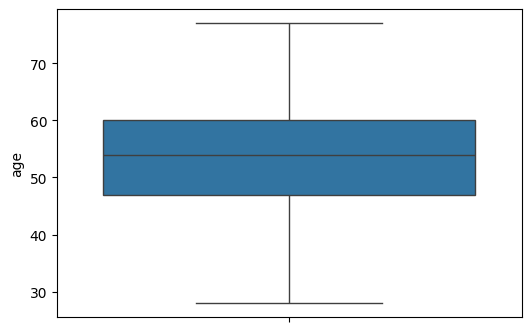

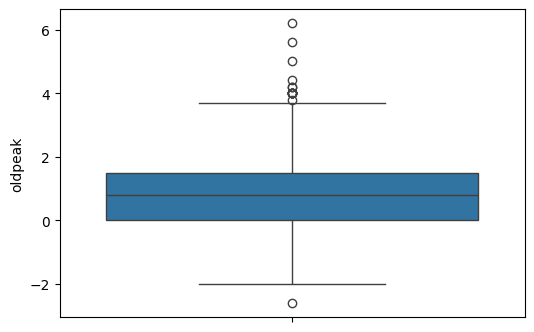

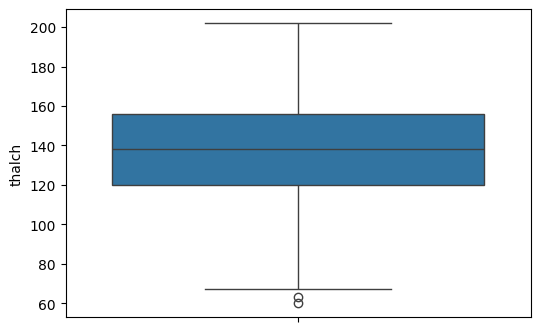

In [339]:
numericals = ["age", "oldpeak", "thalch"]

for col in numericals:
  plt.figure(figsize=(6,4))
  sns.boxplot(df_filtered[col])
  plt.show()

On supprime les outliers de nos données numériques

In [345]:
from scipy.stats import zscore

df_features = df_filtered[numericals]
z_scores = zscore(df_features)
outliers = df_filtered[(np.abs(z_scores) > 3).any(axis=1)]
outliers

,age,oldpeak,exang,thalch,cp,num
91,62,6.2,False,145.0,asymptomatic,3
123,55,5.6,True,111.0,asymptomatic,3
183,59,4.2,False,145.0,typical angina,0
191,51,4.2,True,122.0,asymptomatic,3
285,58,4.4,False,140.0,asymptomatic,4
589,50,5.0,True,140.0,asymptomatic,1
615,46,-2.6,False,133.0,asymptomatic,1
631,51,0.0,False,60.0,asymptomatic,2


On encode les valeurs catégorielles

In [350]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered['cp'] = le.fit_transform(df_filtered['cp'])
df_filtered["exang"] = le.fit_transform(df_filtered["exang"])

/tmp/ipython-input-350-1127472972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cp'] = le.fit_transform(df_filtered['cp'])
/tmp/ipython-input-350-1127472972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["exang"] = le.fit_transform(df_filtered["exang"])


In [346]:
df_filtered.drop(index=outliers.index, inplace=True)

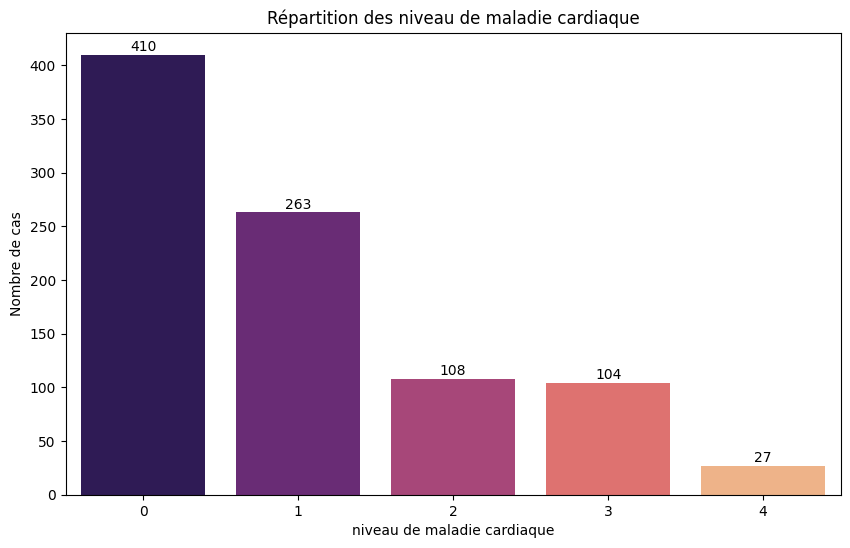

In [347]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_filtered, x='num', palette = 'magma')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        int(height),
        ha="center", va="bottom", fontsize=10
    )
plt.title('Répartition des niveau de maladie cardiaque')
plt.xlabel('niveau de maladie cardiaque')
plt.ylabel('Nombre de cas')
plt.show()

Nous effectuons un oversampling des classes 2, 3 et 4, et un undersampling des classes 0 et 1, afin d’obtenir un jeu de données plus équilibré.

In [351]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


X = df_filtered.drop(columns='num')
y = df_filtered['num']


sampling_over = {
    2: 200,
    3: 150,
    4: 75
}

sampling_under = {
    0: 200,
    1: 200,
    2: 200,
    3: 150,
    4: 75
}

over = SMOTE(sampling_strategy=sampling_over, random_state=42)
under = RandomUnderSampler(sampling_strategy=sampling_under, random_state=42)

resample_pipeline = Pipeline(steps=[
    ('oversample', over),
    ('undersample', under)
])

X_resampled, y_resampled = resample_pipeline.fit_resample(X, y)


In [354]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled

,age,oldpeak,exang,thalch,cp,num
307,34,0.000000,0,190.000000,1,0
246,57,1.500000,1,126.000000,0,0
223,67,0.000000,0,172.000000,2,0
167,45,0.000000,0,138.000000,1,0
130,29,0.000000,0,202.000000,1,0
...,...,...,...,...,...,...
728,63,2.500000,1,84.000000,0,4
1064,40,3.817699,0,179.522210,2,4
47,50,2.600000,0,128.000000,0,4
1084,50,2.348397,0,126.170163,0,4


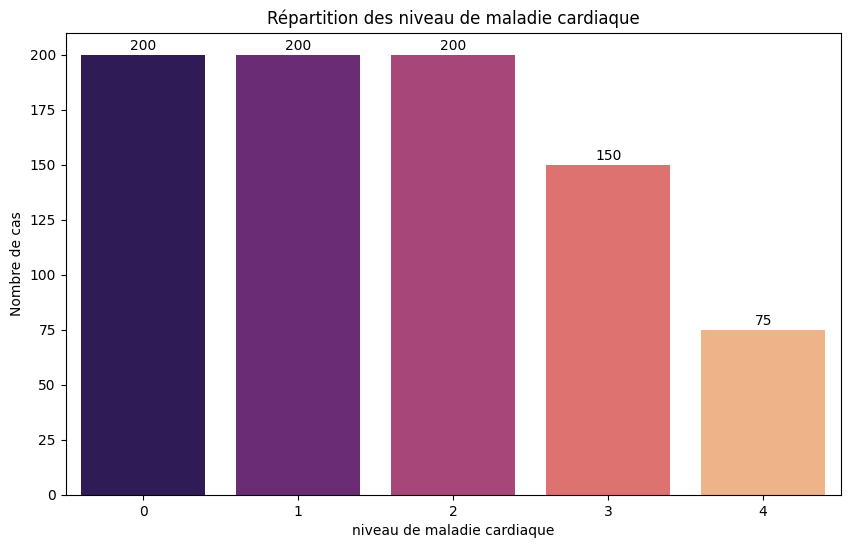

In [355]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_resampled, x='num', palette = 'magma')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        int(height),
        ha="center", va="bottom", fontsize=10
    )
plt.title('Répartition des niveau de maladie cardiaque')
plt.xlabel('niveau de maladie cardiaque')
plt.ylabel('Nombre de cas')
plt.show()

On normalise les données numériques.


In [359]:
from sklearn.preprocessing import StandardScaler

standardize = ["age", "oldpeak", "thalch"]

scaler = StandardScaler()
df_resampled[standardize] = scaler.fit_transform(df_resampled[standardize])

In [360]:
df_resampled.head()

,age,oldpeak,exang,thalch,cp,num
307,-2.350479,-1.054448,0,2.347215,1,0
246,0.193170,0.348744,1,-0.306430,0,0
223,1.299104,-1.054448,0,1.600878,2,0
167,-1.133951,-1.054448,0,0.191129,1,0
130,-2.903447,-1.054448,0,2.844774,1,0


# **2. Model Training:**

On entraine notre logistic Regression sur nos données en utilisant KFold

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_resampled.drop(columns='num')
y = df_resampled['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# **3. Model Evaluation**

In [368]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Accuracy" : [accuracy_score(y_test, y_pred_lr)],
    "Precision" : [precision_score(y_test, y_pred_lr, average='weighted')],
    "Recall" : [recall_score(y_test, y_pred_lr, average='weighted')],
    "F1 Score" : [f1_score(y_test, y_pred_lr, average='weighted')]
}

metrics = pd.DataFrame(metrics, index=["Logistic regression"]).T
metrics

,Logistic regression
Accuracy,0.442424
Precision,0.431941
Recall,0.442424
F1 Score,0.418401


Les scores montrent que la régression logistique est peu performante. Avec une accuracy de 44 % et un F1-score de 41 %, le modèle peine à bien prédire les niveaux de maladie cardiaque. Il semble trop simple pour ce problème multiclasses.

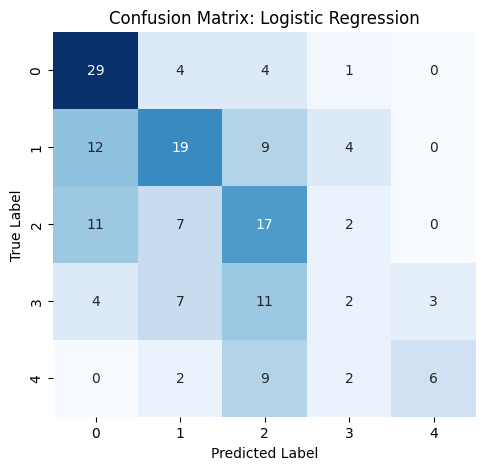

In [369]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

La classe 0 est assez bien prédite, mais les autres sont souvent confondues. Le modèle distingue mal les niveaux de gravité.